In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv(r'Walmart DataSet.csv')

In [3]:
data1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
data1.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data1['Date'] = pd.to_datetime(data1['Date'], format='%d-%m-%Y')

In [6]:
data1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
data1.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
data1.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Store              Axes(0.125,0.712609;0.168478x0.167391)
Weekly_Sales    Axes(0.327174,0.712609;0.168478x0.167391)
Holiday_Flag    Axes(0.529348,0.712609;0.168478x0.167391)
Temperature     Axes(0.731522,0.712609;0.168478x0.167391)
Fuel_Price         Axes(0.125,0.511739;0.168478x0.167391)
CPI             Axes(0.327174,0.511739;0.168478x0.167391)
Unemployment    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

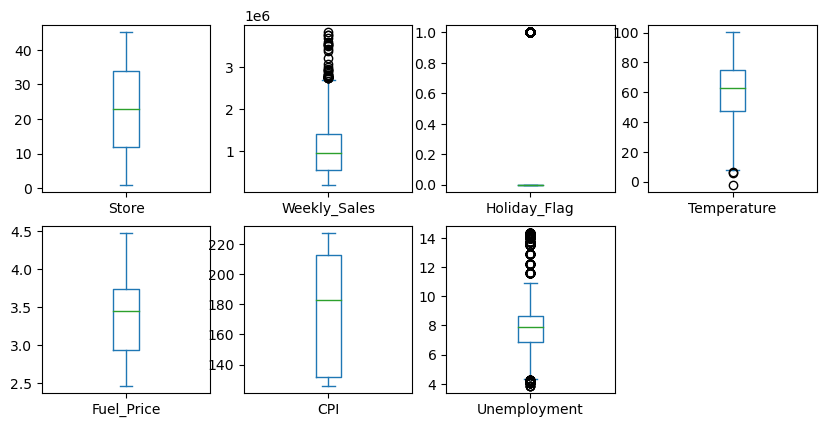

In [9]:
data1.plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

In [10]:
date_sales = data1.groupby("Date")[["Weekly_Sales"]].sum().reset_index()
date_sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


### c. Does temperature affect the weekly sales in any manner?

In [11]:
temp_mean= data1.groupby('Date')['Temperature'].mean().reset_index()
temp_mean

,Date,Temperature
0,2010-02-05,34.037333
1,2010-02-12,34.151333
2,2010-02-19,37.719778
3,2010-02-26,39.243556
4,2010-03-05,42.917333
...,...,...
138,2012-09-28,68.754444
139,2012-10-05,65.973111
140,2012-10-12,58.342667
141,2012-10-19,60.705333


In [12]:
date_sales= date_sales.reset_index()
date_sales

,index,Date,Weekly_Sales
0,0,2010-02-05,49750740.50
1,1,2010-02-12,48336677.63
2,2,2010-02-19,48276993.78
3,3,2010-02-26,43968571.13
4,4,2010-03-05,46871470.30
...,...,...,...
138,138,2012-09-28,43734899.40
139,139,2012-10-05,47566639.31
140,140,2012-10-12,46128514.25
141,141,2012-10-19,45122410.57


In [13]:
date_sales= pd.merge(temp_mean, date_sales, on='Date', how='inner')
date_sales

,Date,Temperature,index,Weekly_Sales
0,2010-02-05,34.037333,0,49750740.50
1,2010-02-12,34.151333,1,48336677.63
2,2010-02-19,37.719778,2,48276993.78
3,2010-02-26,39.243556,3,43968571.13
4,2010-03-05,42.917333,4,46871470.30
...,...,...,...,...
138,2012-09-28,68.754444,138,43734899.40
139,2012-10-05,65.973111,139,47566639.31
140,2012-10-12,58.342667,140,46128514.25
141,2012-10-19,60.705333,141,45122410.57


Text(0.5, 1.0, 'Weekly Sales vs. Temperature Over Time')

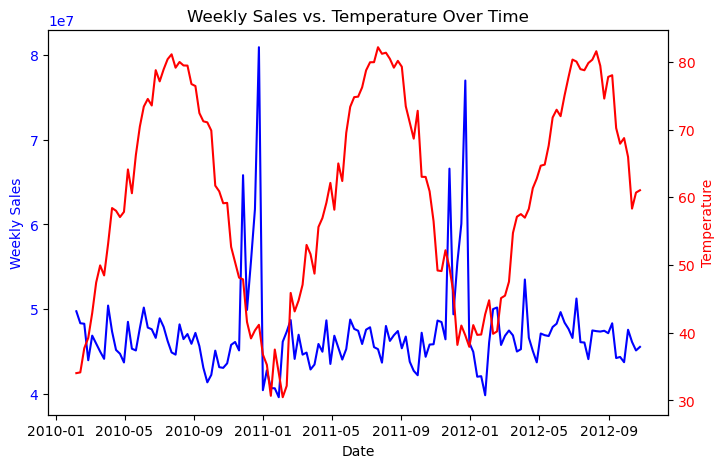

In [14]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Temperature'], color='r', label='Temperature')
ax2.set_ylabel('Temperature', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Temperature Over Time')

Observation: As Temperature increase in summer sales are not as high as in winter which indicates that people go out less frequently in summer due to high temperatures

In [15]:
data1[data1['Holiday_Flag']==0]['Date'].value_counts()

2010-02-05    45
2011-10-28    45
2012-02-24    45
2012-02-17    45
2012-02-03    45
              ..
2010-11-19    45
2010-11-12    45
2010-11-05    45
2010-10-29    45
2012-10-26    45
Name: Date, Length: 133, dtype: int64

In [16]:
data1[data1['Holiday_Flag']==1]['Date'].value_counts()

2010-02-12    45
2010-09-10    45
2010-11-26    45
2010-12-31    45
2011-02-11    45
2011-09-09    45
2011-11-25    45
2011-12-30    45
2012-02-10    45
2012-09-07    45
Name: Date, dtype: int64

In [17]:
holiday_flag= data1.groupby('Date')['Holiday_Flag'].mean().reset_index()
holiday_flag

,Date,Holiday_Flag
0,2010-02-05,0.0
1,2010-02-12,1.0
2,2010-02-19,0.0
3,2010-02-26,0.0
4,2010-03-05,0.0
...,...,...
138,2012-09-28,0.0
139,2012-10-05,0.0
140,2012-10-12,0.0
141,2012-10-19,0.0


In [18]:
date_sales= pd.merge(holiday_flag, date_sales, on='Date', how='inner')
date_sales

,Date,Holiday_Flag,Temperature,index,Weekly_Sales
0,2010-02-05,0.0,34.037333,0,49750740.50
1,2010-02-12,1.0,34.151333,1,48336677.63
2,2010-02-19,0.0,37.719778,2,48276993.78
3,2010-02-26,0.0,39.243556,3,43968571.13
4,2010-03-05,0.0,42.917333,4,46871470.30
...,...,...,...,...,...
138,2012-09-28,0.0,68.754444,138,43734899.40
139,2012-10-05,0.0,65.973111,139,47566639.31
140,2012-10-12,0.0,58.342667,140,46128514.25
141,2012-10-19,0.0,60.705333,141,45122410.57


### b. If the weekly sales show a seasonal trend, when and what could be the reason?


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

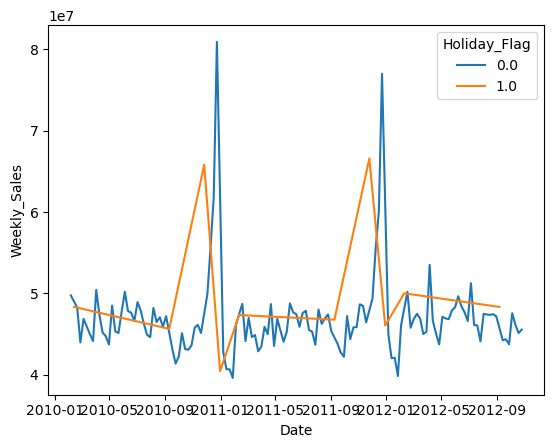

In [19]:
sns.lineplot(x=date_sales['Date'], y=date_sales['Weekly_Sales'], hue=date_sales['Holiday_Flag'])

Observation: sales show greater increase (spikes) during holidays and non holiday periods in december and drops during the period of january

In [20]:
data1.groupby(['Date'])['Fuel_Price'].var().sort_values(ascending=False).reset_index()

,Date,Fuel_Price
0,2012-10-12,0.092171
1,2012-10-19,0.087517
2,2012-10-26,0.078129
3,2012-03-02,0.068691
4,2012-02-24,0.065857
...,...,...
138,2010-03-26,0.012360
139,2010-06-04,0.012174
140,2010-04-16,0.012087
141,2010-04-09,0.010934


In [21]:
Fuel_price= data1.groupby('Date')['Fuel_Price'].mean().reset_index()
Fuel_price

,Date,Fuel_Price
0,2010-02-05,2.717844
1,2010-02-12,2.694022
2,2010-02-19,2.672067
3,2010-02-26,2.683933
4,2010-03-05,2.731200
...,...,...
138,2012-09-28,3.854578
139,2012-10-05,3.845222
140,2012-10-12,3.896733
141,2012-10-19,3.880000


In [22]:
date_sales= pd.merge(Fuel_price, date_sales, on='Date', how='inner')
date_sales

,Date,Fuel_Price,Holiday_Flag,Temperature,index,Weekly_Sales
0,2010-02-05,2.717844,0.0,34.037333,0,49750740.50
1,2010-02-12,2.694022,1.0,34.151333,1,48336677.63
2,2010-02-19,2.672067,0.0,37.719778,2,48276993.78
3,2010-02-26,2.683933,0.0,39.243556,3,43968571.13
4,2010-03-05,2.731200,0.0,42.917333,4,46871470.30
...,...,...,...,...,...,...
138,2012-09-28,3.854578,0.0,68.754444,138,43734899.40
139,2012-10-05,3.845222,0.0,65.973111,139,47566639.31
140,2012-10-12,3.896733,0.0,58.342667,140,46128514.25
141,2012-10-19,3.880000,0.0,60.705333,141,45122410.57


Text(0.5, 1.0, 'Weekly Sales vs. Fuel_Price Over Time')

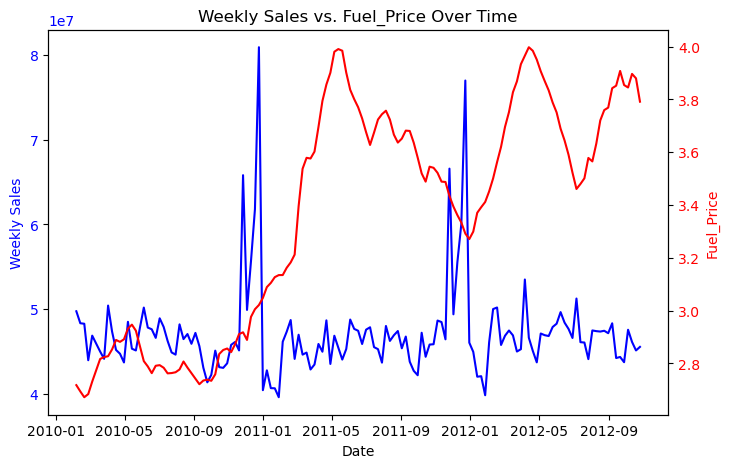

In [23]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Fuel_Price'], color='r', label='Fuel_Price')
ax2.set_ylabel('Fuel_Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Fuel_Price Over Time')

 Fuel prices seem to increase over time due to inflation but it has nothing to do with sales, i.e: it has no correlation with sales

<Axes: >

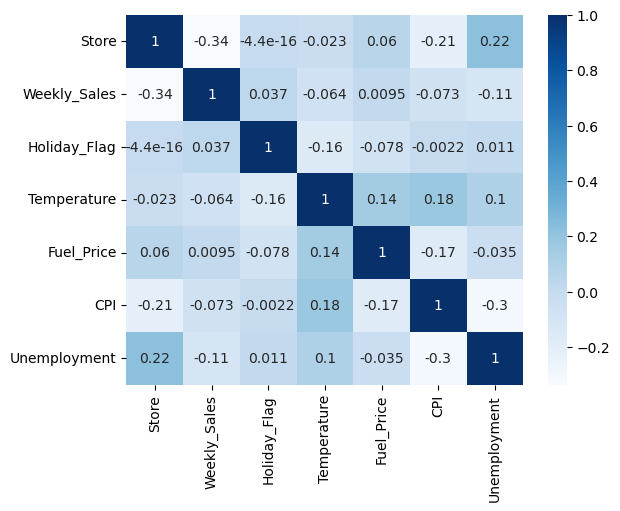

In [24]:
sns.heatmap(data1.corr(),annot=True,cmap='Blues')

Observation: No direct correlation between any feature with the other based on pearson correlation values

### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [25]:
Unemployment= data1.groupby('Date')['Unemployment'].mean().reset_index()
Unemployment

,Date,Unemployment
0,2010-02-05,8.619311
1,2010-02-12,8.619311
2,2010-02-19,8.619311
3,2010-02-26,8.619311
4,2010-03-05,8.619311
...,...,...
138,2012-09-28,7.237333
139,2012-10-05,6.953711
140,2012-10-12,6.953711
141,2012-10-19,6.953711


In [26]:
date_sales= pd.merge(Unemployment, date_sales, on='Date', how='inner')
date_sales

,Date,Unemployment,Fuel_Price,Holiday_Flag,Temperature,index,Weekly_Sales
0,2010-02-05,8.619311,2.717844,0.0,34.037333,0,49750740.50
1,2010-02-12,8.619311,2.694022,1.0,34.151333,1,48336677.63
2,2010-02-19,8.619311,2.672067,0.0,37.719778,2,48276993.78
3,2010-02-26,8.619311,2.683933,0.0,39.243556,3,43968571.13
4,2010-03-05,8.619311,2.731200,0.0,42.917333,4,46871470.30
...,...,...,...,...,...,...,...
138,2012-09-28,7.237333,3.854578,0.0,68.754444,138,43734899.40
139,2012-10-05,6.953711,3.845222,0.0,65.973111,139,47566639.31
140,2012-10-12,6.953711,3.896733,0.0,58.342667,140,46128514.25
141,2012-10-19,6.953711,3.880000,0.0,60.705333,141,45122410.57


Text(0.5, 1.0, 'Weekly Sales vs. Unemployment Over Time')

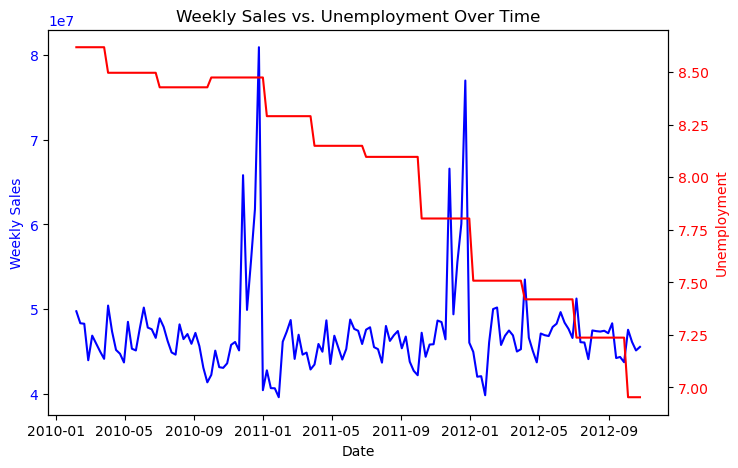

In [27]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['Unemployment'], color='r', label='Unemployment')
ax2.set_ylabel('Unemployment', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. Unemployment Over Time')

Observation: unemployement doesn't affect sales. however it decreases considerably over time

### d. How is the Consumer Price index affecting the weekly sales of various stores?

In [28]:
data1.groupby('Date')['CPI'].std()

Date
2010-02-05    38.692144
2010-02-12    38.732430
2010-02-19    38.737027
2010-02-26    38.735680
2010-03-05    38.734337
                ...    
2012-09-28    41.517399
2012-10-05    41.588349
2012-10-12    41.659314
2012-10-19    41.688018
2012-10-26    41.709751
Name: CPI, Length: 143, dtype: float64

In [29]:
CPI= data1.groupby('Date')['CPI'].mean().reset_index()
CPI

,Date,CPI
0,2010-02-05,167.730885
1,2010-02-12,167.825608
2,2010-02-19,167.871686
3,2010-02-26,167.909657
4,2010-03-05,167.947628
...,...,...
138,2012-09-28,176.373588
139,2012-10-05,176.505052
140,2012-10-12,176.636515
141,2012-10-19,176.652613


In [30]:
date_sales= pd.merge(CPI, date_sales, on='Date', how='inner')
date_sales

,Date,CPI,Unemployment,Fuel_Price,Holiday_Flag,Temperature,index,Weekly_Sales
0,2010-02-05,167.730885,8.619311,2.717844,0.0,34.037333,0,49750740.50
1,2010-02-12,167.825608,8.619311,2.694022,1.0,34.151333,1,48336677.63
2,2010-02-19,167.871686,8.619311,2.672067,0.0,37.719778,2,48276993.78
3,2010-02-26,167.909657,8.619311,2.683933,0.0,39.243556,3,43968571.13
4,2010-03-05,167.947628,8.619311,2.731200,0.0,42.917333,4,46871470.30
...,...,...,...,...,...,...,...,...
138,2012-09-28,176.373588,7.237333,3.854578,0.0,68.754444,138,43734899.40
139,2012-10-05,176.505052,6.953711,3.845222,0.0,65.973111,139,47566639.31
140,2012-10-12,176.636515,6.953711,3.896733,0.0,58.342667,140,46128514.25
141,2012-10-19,176.652613,6.953711,3.880000,0.0,60.705333,141,45122410.57


Text(0.5, 1.0, 'Weekly Sales vs. CPI Over Time')

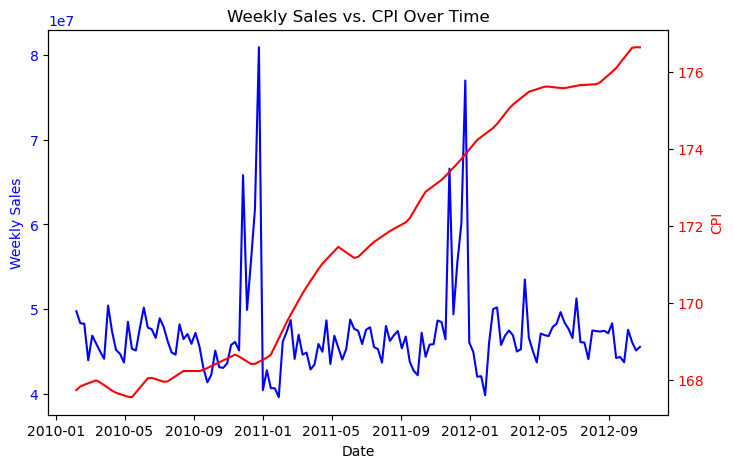

In [31]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(date_sales['Date'], date_sales['Weekly_Sales'], color='b', label='Weekly Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(date_sales['Date'], date_sales['CPI'], color='r', label='CPI')
ax2.set_ylabel('CPI', color='r')
ax2.tick_params(axis='y', labelcolor='r')


plt.title('Weekly Sales vs. CPI Over Time')

Observation: CPI has no direct correlation with sales overtime.

### e. Top performing stores according to the historical data.
### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [32]:
store_sales = data1.groupby(['Store'], as_index=False).agg(Sum_of_Weekly_Sales=('Weekly_Sales','sum'))

In [33]:
x=store_sales[(store_sales['Sum_of_Weekly_Sales'] == max(store_sales['Sum_of_Weekly_Sales']))]
x

,Store,Sum_of_Weekly_Sales
19,20,3.013978e+08


In [34]:
y=store_sales[(store_sales['Sum_of_Weekly_Sales'] == min(store_sales['Sum_of_Weekly_Sales']))]
y

,Store,Sum_of_Weekly_Sales
32,33,37160221.96


In [35]:
store_sales['Sum_of_Weekly_Sales'].max()-store_sales['Sum_of_Weekly_Sales'].min()

264237570.49999997

<Axes: xlabel='Store', ylabel='Sum_of_Weekly_Sales'>

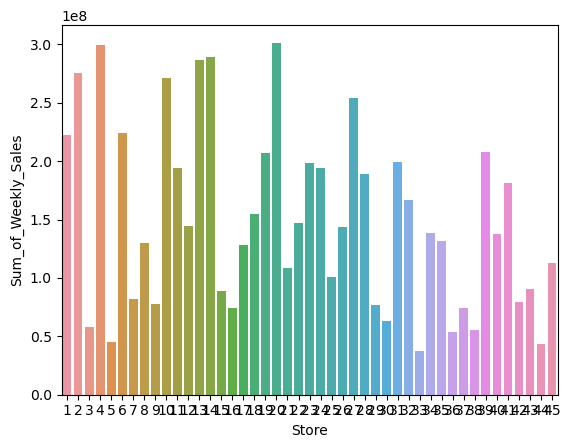

In [36]:
sns.barplot(store_sales,x='Store',y='Sum_of_Weekly_Sales')

In [37]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

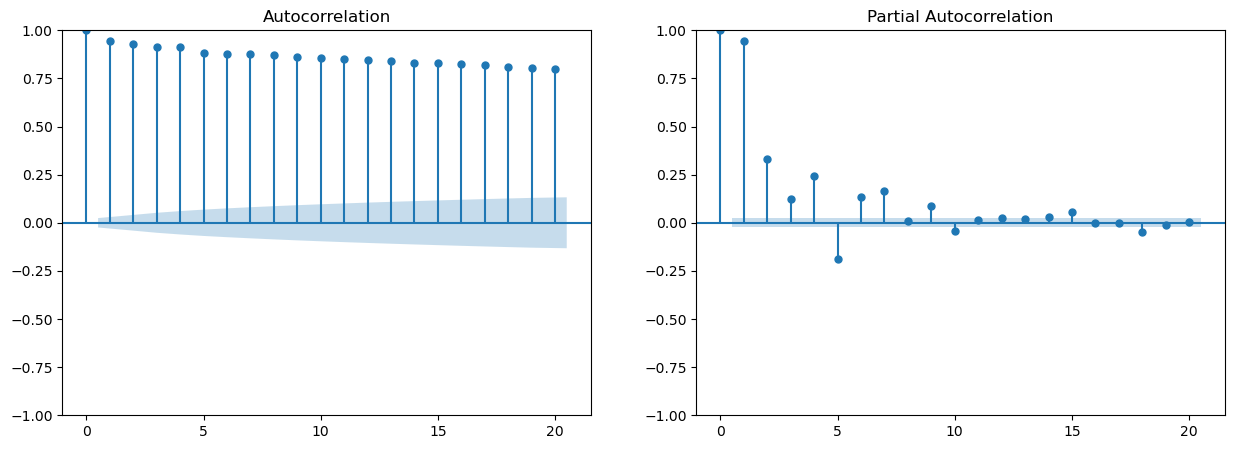

In [38]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121)
    fig = plot_acf(data , lags = 20 , ax = ax1)
    ax2 = fig.add_subplot(122)
    fig = plot_pacf(data , lags = 20 , ax = ax2)

ACF_and_PACF(data1['Weekly_Sales'])

In [39]:
data1 = data1.set_index('Date')
data1.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [42]:
sales=data1.groupby("Date")[["Weekly_Sales"]].sum()
y = sales['Weekly_Sales'].resample('1w').mean()

[]

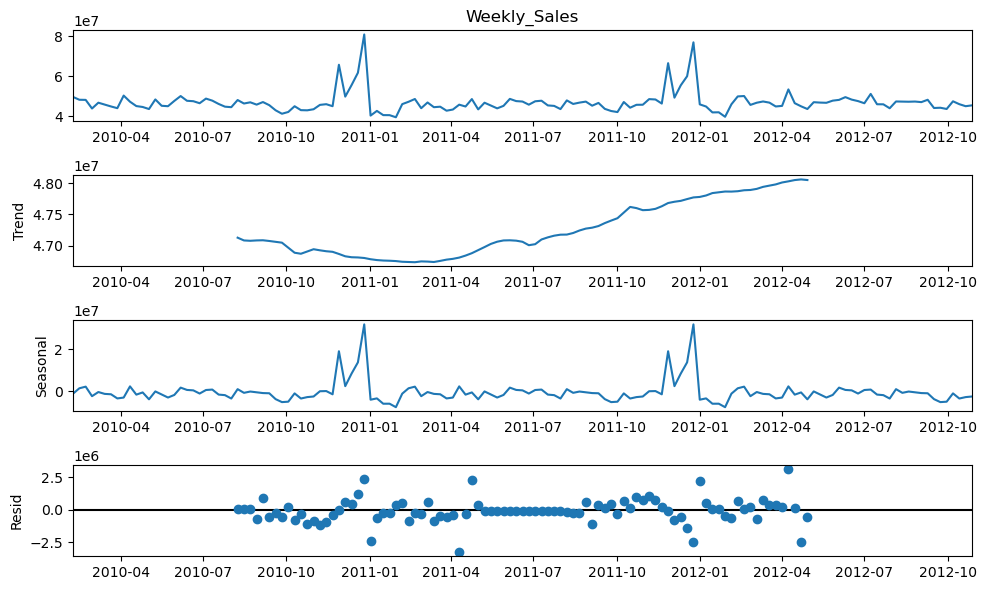

In [43]:
decomposition = sm.tsa.seasonal_decompose(y , model = "additive").plot()
plt.plot()

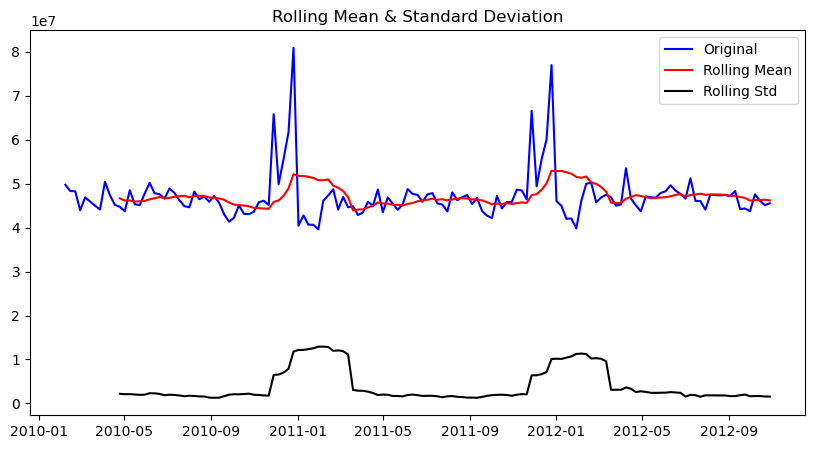

In [44]:
#Determine rolling statistics
plt.figure(figsize=(10,5))

rolmean = y.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = y.rolling(window=12).std()
#Plot rolling statistics
orig = plt.plot(y, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


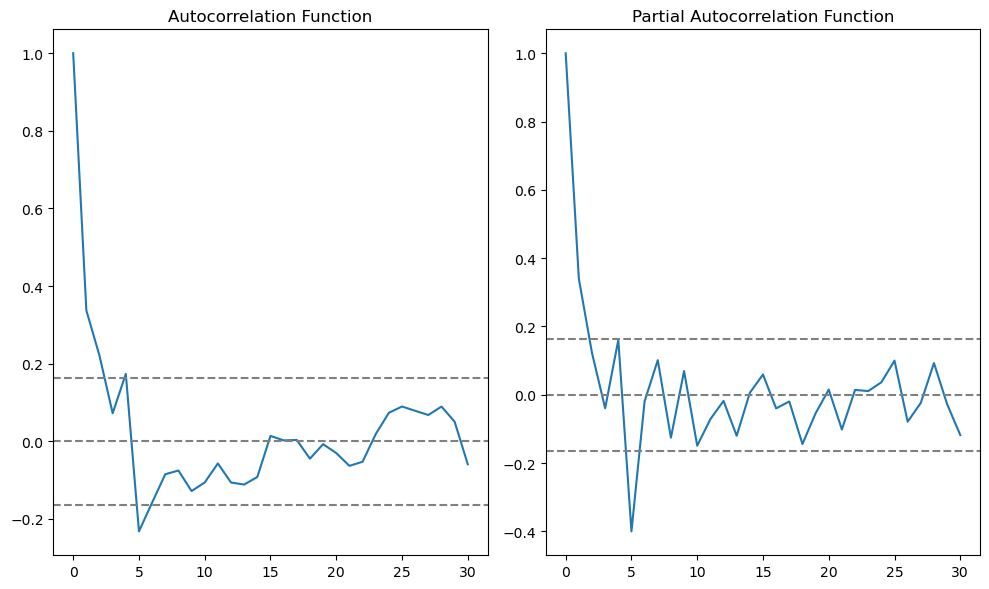

In [45]:
lag_acf = acf(y, nlags=30)
lag_pacf = pacf(y, nlags=30)

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

In [46]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(y, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=8,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
print("AIC value : ",model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[8]             : AIC=4605.627, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=4670.045, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=4623.886, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=4603.756, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[8]             : AIC=4648.338, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[8]             : AIC=4604.451, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[8]             : AIC=4604.467, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[8]             : AIC=4621.481, Time=0.05 sec
 ARIMA(0,1,1)(1,1,2)[8]             : AIC=4606.450, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=4618.577, Time=0.06 sec
 ARIMA(0,1,2)(0,1,1)[8]             : AIC=4609.665, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[8]             : AIC=4606.640, Time=0.08 sec
 ARIMA(1,1,2)(0,1,1)[8]             : AIC=4608.795, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[8] intercept   : AIC=4605.511, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,1,1)

In [47]:
train = y.loc['2010-02-5':'2012-02-17']
test = y.loc['2012-02-17':]

In [48]:
model.fit(train)
future_forecast =model.predict(n_periods=1609)

<Axes: xlabel='Date'>

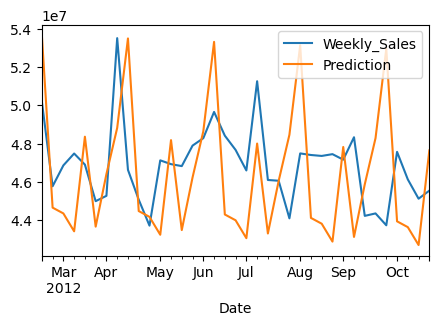

In [49]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot(figsize=(5,3))

<Axes: xlabel='Date'>

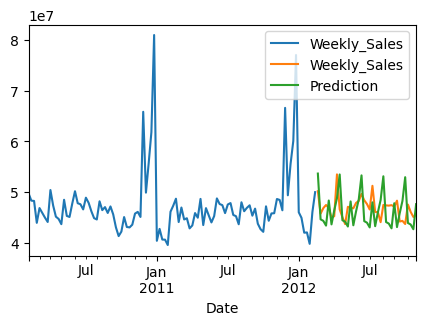

In [50]:
pd.concat([train,test,future_forecast],axis=1).plot(figsize=(5,3))

In [51]:
# Assuming you have the predicted values in 'future_forecast' and 'test' contains the actual values
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, future_forecast)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, future_forecast)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 3023338.58
Mean Squared Error (MSE): 12734968035761.96
Root Mean Squared Error (RMSE): 3568608.70


In [57]:
future_forecast = model.predict(n_periods=12)

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start='2012-10-26', periods=12, freq='W',closed='right')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': future_forecast})

In [60]:
forecast_df

,Date,Forecasted_Sales
2012-02-19,2012-10-28,5.366492e+07
2012-02-26,2012-11-04,4.465658e+07
2012-03-04,2012-11-11,4.435327e+07
2012-03-11,2012-11-18,4.342007e+07
2012-03-18,2012-11-25,4.835804e+07
2012-03-25,2012-12-02,4.366534e+07
2012-04-01,2012-12-09,4.640799e+07
2012-04-08,2012-12-16,4.881869e+07
2012-04-15,2012-12-23,5.348613e+07
2012-04-22,2012-12-30,4.447779e+07


In [61]:
forecast_df.to_csv('forecasted.csv')